### Braitenberg implemetation

In [13]:
import pygame
import math
import random

# Initialize Pygame
pygame.init()

# Window setup
WIDTH, HEIGHT = 1000, 1000
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Pygame Robot with Teleoperation & Braitenberg Behavior")

# Font setup for on-screen text
font = pygame.font.Font(None, 36)
text = font.render("Key: ", True, (0, 0, 0))

# Define colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)
TRACE_COLOR = (0, 255, 0)  # Green trace
OBSTACLE_COLOR = (0, 0, 255)  # Blue for obstacles

# User Inputs
try:
    max_speed = float(input("Enter Robot Max Speed (default 1): ") or 1)  # Default = 1
    turn_speed = float(input("Enter Turning Speed (default 1): ") or 1)  # Default = 1
    sensor_range = float(input("Enter Sensor Range for Obstacle Detection (default 50): ") or 50)  # Default = 50
except ValueError:
    print("Invalid input! Using default values.")
    max_speed = 1
    turn_speed = 1
    sensor_range = 100

# Robot setup
robot_x, robot_y = WIDTH // 2, HEIGHT // 2  # Start in the middle
robot_size = 40
heading_angle = 90  # Facing upwards
speed = 0  # Initial speed
acceleration = 0.2  # Acceleration rate
deceleration = 0.1  # Deceleration rate

# Store trace positions
trace_points = []

# Generate random obstacles
num_obstacles = 10
obstacles = []
for _ in range(num_obstacles):
    obs_x = random.randint(50, WIDTH - 50)
    obs_y = random.randint(50, HEIGHT - 50)
    obstacles.append(pygame.Rect(obs_x, obs_y, 40, 40))  # Square obstacles

# Function to check sensor readings
def get_sensor_readings():
    front_sensor = sensor_range
    left_sensor = sensor_range
    right_sensor = sensor_range

    for obs in obstacles:
        obs_center = obs.center

        # Distance to the obstacle
        distance = math.sqrt((obs_center[0] - robot_x) ** 2 + (obs_center[1] - robot_y) ** 2)

        # Get the relative angle
        angle_to_obs = math.degrees(math.atan2(robot_y - obs_center[1], obs_center[0] - robot_x))
        relative_angle = (angle_to_obs - heading_angle) % 360

        # Check which sensor detects the obstacle
        if distance < sensor_range:
            if 330 <= relative_angle or relative_angle <= 30:  # Front sensor range
                front_sensor = min(front_sensor, distance)
            elif 30 < relative_angle <= 150:  # Left sensor range
                left_sensor = min(left_sensor, distance)
            elif 210 <= relative_angle < 330:  # Right sensor range
                right_sensor = min(right_sensor, distance)

    return front_sensor, left_sensor, right_sensor

# Main loop
running = True
autonomous_mode = False  # Toggle for Braitenberg behavior

while running:
    screen.fill(WHITE)  # Clear screen

    # Draw obstacles
    for obs in obstacles:
        pygame.draw.rect(screen, OBSTACLE_COLOR, obs)

    # Draw trace
    for point in trace_points:
        pygame.draw.circle(screen, TRACE_COLOR, point, 2)

    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            autonomous_mode = not autonomous_mode  # Toggle Braitenberg behavior

    # Get key presses
    keys = pygame.key.get_pressed()

    # Autonomous Mode (Braitenberg Behavior)
    if autonomous_mode:
        front_sensor, left_sensor, right_sensor = get_sensor_readings()

        if front_sensor < sensor_range * 0.5:  # If obstacle is too close in front
            if left_sensor > right_sensor:
                heading_angle += turn_speed  # Turn left
            else:
                heading_angle -= turn_speed  # Turn right
        elif left_sensor < sensor_range * 0.7:  # Obstacle on left, turn right
            heading_angle -= turn_speed
        elif right_sensor < sensor_range * 0.7:  # Obstacle on right, turn left
            heading_angle += turn_speed
        else:
            speed = min(max_speed, speed + acceleration)  # Move forward
    else:
        # Teleoperation Mode
        if keys[pygame.K_LEFT]:  
            heading_angle += turn_speed  # Turn left (counterclockwise)
            print(f"Turning LEFT (Angle: {heading_angle % 360} degrees)")

        if keys[pygame.K_RIGHT]:  
            heading_angle -= turn_speed  # Turn right (clockwise)
            print(f"Turning RIGHT (Angle: {heading_angle % 360} degrees)")

        # Acceleration & Deceleration
        if keys[pygame.K_UP]:  
            speed = min(max_speed, speed + acceleration)  # Accelerate forward
        elif keys[pygame.K_DOWN]:  
            speed = max(-max_speed, speed - acceleration)  # Accelerate backward
        else:  
            if speed > 0:
                speed = max(0, speed - deceleration)  # Gradually slow down
            elif speed < 0:
                speed = min(0, speed + deceleration)  # Gradually slow down

    # Convert angle to movement
    robot_x += speed * math.cos(math.radians(heading_angle))
    robot_y -= speed * math.sin(math.radians(heading_angle))

    # Boundary conditions (keep robot inside window)
    robot_x = max(robot_size // 2, min(WIDTH - robot_size // 2, robot_x))
    robot_y = max(robot_size // 2, min(HEIGHT - robot_size // 2, robot_y))

    # Store trace
    trace_points.append((int(robot_x), int(robot_y)))

    # Draw the robot (rotating triangle)
    robot = pygame.Surface((robot_size, robot_size), pygame.SRCALPHA)
    pygame.draw.polygon(robot, RED, [(robot_size // 2, 0), (0, robot_size), (robot_size, robot_size)])
    rotated_robot = pygame.transform.rotate(robot, heading_angle - 90)

    # Get new rectangle position
    rect = rotated_robot.get_rect(center=(robot_x, robot_y))
    screen.blit(rotated_robot, rect.topleft)

    # Display mode text
    mode_text = font.render(f"Mode: {'Autonomous' if autonomous_mode else 'Teleoperation'}", True, (0, 0, 0))
    screen.blit(mode_text, (10, 50))

    pygame.display.update()  # Update display

pygame.quit()


Turning RIGHT (Angle: 89.0 degrees)
Turning RIGHT (Angle: 88.0 degrees)
Turning RIGHT (Angle: 87.0 degrees)
Turning RIGHT (Angle: 86.0 degrees)
Turning RIGHT (Angle: 85.0 degrees)
Turning RIGHT (Angle: 84.0 degrees)
Turning RIGHT (Angle: 83.0 degrees)
Turning RIGHT (Angle: 82.0 degrees)
Turning RIGHT (Angle: 81.0 degrees)
Turning RIGHT (Angle: 80.0 degrees)
Turning RIGHT (Angle: 79.0 degrees)
Turning RIGHT (Angle: 78.0 degrees)
Turning RIGHT (Angle: 77.0 degrees)
Turning RIGHT (Angle: 76.0 degrees)
Turning RIGHT (Angle: 75.0 degrees)
Turning RIGHT (Angle: 74.0 degrees)
Turning RIGHT (Angle: 73.0 degrees)
Turning RIGHT (Angle: 72.0 degrees)
Turning RIGHT (Angle: 71.0 degrees)
Turning RIGHT (Angle: 70.0 degrees)
Turning RIGHT (Angle: 69.0 degrees)
Turning RIGHT (Angle: 68.0 degrees)
Turning RIGHT (Angle: 67.0 degrees)
Turning RIGHT (Angle: 66.0 degrees)
Turning RIGHT (Angle: 65.0 degrees)
Turning RIGHT (Angle: 64.0 degrees)
Turning RIGHT (Angle: 63.0 degrees)
Turning RIGHT (Angle: 62.0 d

In [7]:
import pygame
import math
import random

# Initialize Pygame
pygame.init()

# Window setup
WIDTH, HEIGHT = 1000, 1000
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Braitenberg Vehicle (Autonomous Mode)")

# Font setup for on-screen text
font = pygame.font.Font(None, 36)

# Define colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)
TRACE_COLOR = (0, 255, 0)  # Green trace
OBSTACLE_COLOR = (0, 0, 255)  # Blue for obstacles
SENSOR_SAFE = (0, 255, 0)  # Green (Safe)
SENSOR_DETECTED = (255, 0, 0)  # Red (Obstacle detected)

# User Inputs
try:
    num_obstacles = int(input("Enter number of obstacles (default 5): ") or 5)  # Default = 5
    max_speed = float(input("Enter Robot Max Speed (default 0.5): ") or 0.5)  # Default = 0.5
    turn_angle = float(input("Enter Turning Angle when avoiding obstacles (default 30): ") or 30)  # Default = 30
    sensor_range = float(input("Enter Sensor Range for Obstacle Detection (default 70): ") or 70)  # Default = 70
except ValueError:
    print("Invalid input! Using default values.")
    num_obstacles = 5
    max_speed = 0.5
    turn_angle = 30
    sensor_range = 70

# Robot setup
robot_x, robot_y = WIDTH // 2, HEIGHT // 2  # Start in the middle
robot_size = 40
heading_angle = 90  # Facing upwards
speed = max_speed / 2  # Start with a slow speed
acceleration = 0.1  # Acceleration rate
deceleration = 0.05  # Deceleration rate

# Store trace positions
trace_points = []

# Generate random obstacles
obstacles = []
for _ in range(num_obstacles):
    obs_x = random.randint(100, WIDTH - 100)
    obs_y = random.randint(100, HEIGHT - 100)
    obstacles.append(pygame.Rect(obs_x, obs_y, 50, 50))  # Square obstacles

# Function to check sensor readings
def get_sensor_readings():
    """Simulates left, right, and front sensors to detect obstacles and walls."""
    front_sensor = sensor_range
    left_sensor = sensor_range
    right_sensor = sensor_range

    # Detect walls as obstacles
    if robot_x - sensor_range <= 0:  # Left wall
        left_sensor = min(left_sensor, robot_x)
    if robot_x + sensor_range >= WIDTH:  # Right wall
        right_sensor = min(right_sensor, WIDTH - robot_x)
    if robot_y - sensor_range <= 0:  # Top wall
        front_sensor = min(front_sensor, robot_y)
    if robot_y + sensor_range >= HEIGHT:  # Bottom wall
        front_sensor = min(front_sensor, HEIGHT - robot_y)

    # Detect obstacles
    for obs in obstacles:
        obs_center = obs.center
        distance = math.sqrt((obs_center[0] - robot_x) ** 2 + (obs_center[1] - robot_y) ** 2)
        angle_to_obs = math.degrees(math.atan2(robot_y - obs_center[1], obs_center[0] - robot_x))
        relative_angle = (angle_to_obs - heading_angle) % 360

        if distance < sensor_range:
            if 330 <= relative_angle or relative_angle <= 30:  # Front sensor
                front_sensor = min(front_sensor, distance)
            elif 30 < relative_angle <= 150:  # Left sensor
                left_sensor = min(left_sensor, distance)
            elif 210 <= relative_angle < 330:  # Right sensor
                right_sensor = min(right_sensor, distance)

    return front_sensor, left_sensor, right_sensor

# Main loop
running = True
while running:
    screen.fill(WHITE)  # Clear screen

    # Draw obstacles
    for obs in obstacles:
        pygame.draw.rect(screen, OBSTACLE_COLOR, obs)

    # Draw trace
    for point in trace_points:
        pygame.draw.circle(screen, TRACE_COLOR, point, 2)

    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Get sensor readings
    front_sensor, left_sensor, right_sensor = get_sensor_readings()

    # Determine sensor colors (Green = Safe, Red = Obstacle detected)
    front_sensor_color = SENSOR_DETECTED if front_sensor < sensor_range else SENSOR_SAFE
    left_sensor_color = SENSOR_DETECTED if left_sensor < sensor_range else SENSOR_SAFE
    right_sensor_color = SENSOR_DETECTED if right_sensor < sensor_range else SENSOR_SAFE

    # Draw sensor beams
    front_x = robot_x + front_sensor * math.cos(math.radians(heading_angle))
    front_y = robot_y - front_sensor * math.sin(math.radians(heading_angle))
    pygame.draw.line(screen, front_sensor_color, (robot_x, robot_y), (front_x, front_y), 2)

    left_x = robot_x + left_sensor * math.cos(math.radians(heading_angle + 45))
    left_y = robot_y - left_sensor * math.sin(math.radians(heading_angle + 45))
    pygame.draw.line(screen, left_sensor_color, (robot_x, robot_y), (left_x, left_y), 2)

    right_x = robot_x + right_sensor * math.cos(math.radians(heading_angle - 45))
    right_y = robot_y - right_sensor * math.sin(math.radians(heading_angle - 45))
    pygame.draw.line(screen, right_sensor_color, (robot_x, robot_y), (right_x, right_y), 2)

    # Braitenberg behavior: Avoid obstacles
    if front_sensor < sensor_range * 0.5:  # If an obstacle is too close in front
        if left_sensor > right_sensor:
            heading_angle += turn_angle  # Turn left
        else:
            heading_angle -= turn_angle  # Turn right
    elif left_sensor < sensor_range * 0.7:  # Obstacle on left, turn right
        heading_angle -= turn_angle
    elif right_sensor < sensor_range * 0.7:  # Obstacle on right, turn left
        heading_angle += turn_angle
    else:
        speed = min(max_speed, speed + acceleration)  # Move forward

    # Convert angle to movement
    robot_x += speed * math.cos(math.radians(heading_angle))
    robot_y -= speed * math.sin(math.radians(heading_angle))

    # Store trace
    trace_points.append((int(robot_x), int(robot_y)))

    # Draw the robot (rotating triangle)
    robot = pygame.Surface((robot_size, robot_size), pygame.SRCALPHA)
    pygame.draw.polygon(robot, RED, [(robot_size // 2, 0), (0, robot_size), (robot_size, robot_size)])
    rotated_robot = pygame.transform.rotate(robot, heading_angle - 90)

    # Get new rectangle position
    rect = rotated_robot.get_rect(center=(robot_x, robot_y))
    screen.blit(rotated_robot, rect.topleft)

    # Display status text
    mode_text = font.render(f"Speed: {round(speed,2)}, Angle: {heading_angle % 360}", True, (0, 0, 0))
    screen.blit(mode_text, (10, 50))

    pygame.display.update()  # Update display

pygame.quit()


## NEWW


In [2]:
import pygame
import math
import random

# Initialize Pygame
pygame.init()

# Window setup
WIDTH, HEIGHT = 1000, 1000
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Pygame Robot - Braitenberg Vehicle")

# Font setup for display text
font = pygame.font.Font(None, 36)
small_font = pygame.font.Font(None, 24)

# Define colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
BLACK = (0, 0, 0)
YELLOW = (255, 255, 0)

# User Inputs
try:
    max_speed = float(input("Enter Robot Max Speed (default 5): ") or 5)
    turn_rate = float(input("Enter Turning Rate in degrees/unit time (default 3): ") or 3)
    num_obstacles = int(input("Enter number of obstacles (default 10): ") or 10)
    sensor_range = float(input("Enter sensor range (default 150): ") or 150)
    sensitivity = float(input("Enter sensor sensitivity (1-10, default 5): ") or 5)
except ValueError:
    print("Invalid input! Using default values.")
    max_speed = 5
    turn_rate = 3
    num_obstacles = 10
    sensor_range = 150
    sensitivity = 5

# Normalize sensitivity to 0-1 range
sensitivity = sensitivity / 10

# Fixed parameters
acceleration = 0.2
deceleration = 0.1

# Calculate turning radius at max speed
turning_radius = (max_speed / math.radians(turn_rate)) if turn_rate > 0 else float('inf')
print(f"Calculated turning radius at max speed: {turning_radius:.2f} units")

# Robot setup
robot_x, robot_y = WIDTH // 2, HEIGHT // 2  # Start in the middle
robot_size = 40
heading_angle = 90  # Facing upwards
speed = 0  # Initial speed

# Obstacle setup
obstacles = []
obstacle_size = 30

# Ensure obstacles don't overlap with the robot's starting position
min_distance = robot_size + obstacle_size + 50

for _ in range(num_obstacles):
    valid_position = False
    while not valid_position:
        obstacle_x = random.randint(obstacle_size, WIDTH - obstacle_size)
        obstacle_y = random.randint(obstacle_size, HEIGHT - obstacle_size)
        
        # Check distance from robot start position
        distance = math.sqrt((obstacle_x - robot_x)**2 + (obstacle_y - robot_y)**2)
        
        # Check distance from other obstacles
        valid_position = distance >= min_distance
        for obs in obstacles:
            obs_distance = math.sqrt((obstacle_x - obs[0])**2 + (obstacle_y - obs[1])**2)
            if obs_distance < 2 * obstacle_size:
                valid_position = False
                break
                
    obstacles.append((obstacle_x, obstacle_y))

# Sensor configuration
left_sensor_angle = 45  # degrees relative to heading
right_sensor_angle = -45

# Store trace positions and sensor readings
trace_points = []
left_sensor_reading = 0
right_sensor_reading = 0

# Function to get sensor readings based on obstacles
def get_sensor_readings():
    global left_sensor_reading, right_sensor_reading
    
    # Calculate sensor positions
    left_sensor_x = robot_x + math.cos(math.radians(heading_angle + left_sensor_angle)) * (robot_size/2)
    left_sensor_y = robot_y - math.sin(math.radians(heading_angle + left_sensor_angle)) * (robot_size/2)
    
    right_sensor_x = robot_x + math.cos(math.radians(heading_angle + right_sensor_angle)) * (robot_size/2)
    right_sensor_y = robot_y - math.sin(math.radians(heading_angle + right_sensor_angle)) * (robot_size/2)
    
    # Reset sensor readings
    left_sensor_reading = 0
    right_sensor_reading = 0
    
    # Check boundaries
    # Left boundary check
    if robot_x < sensor_range:
        dist_to_boundary = robot_x
        left_intensity = max(0, 1 - (dist_to_boundary / sensor_range))
        # Adjust based on sensor angle
        angle_factor = abs(math.cos(math.radians(heading_angle + left_sensor_angle)))
        left_sensor_reading = max(left_sensor_reading, left_intensity * angle_factor)
        
        angle_factor = abs(math.cos(math.radians(heading_angle + right_sensor_angle)))
        right_sensor_reading = max(right_sensor_reading, left_intensity * angle_factor)
    
    # Right boundary check
    if WIDTH - robot_x < sensor_range:
        dist_to_boundary = WIDTH - robot_x
        right_intensity = max(0, 1 - (dist_to_boundary / sensor_range))
        # Adjust based on sensor angle
        angle_factor = abs(math.cos(math.radians(heading_angle + right_sensor_angle)))
        right_sensor_reading = max(right_sensor_reading, right_intensity * angle_factor)
        
        angle_factor = abs(math.cos(math.radians(heading_angle + left_sensor_angle)))
        left_sensor_reading = max(left_sensor_reading, right_intensity * angle_factor)
    
    # Top boundary check
    if robot_y < sensor_range:
        dist_to_boundary = robot_y
        top_intensity = max(0, 1 - (dist_to_boundary / sensor_range))
        # Adjust based on sensor angle
        angle_factor = abs(math.sin(math.radians(heading_angle + left_sensor_angle)))
        left_sensor_reading = max(left_sensor_reading, top_intensity * angle_factor)
        
        angle_factor = abs(math.sin(math.radians(heading_angle + right_sensor_angle)))
        right_sensor_reading = max(right_sensor_reading, top_intensity * angle_factor)
    
    # Bottom boundary check
    if HEIGHT - robot_y < sensor_range:
        dist_to_boundary = HEIGHT - robot_y
        bottom_intensity = max(0, 1 - (dist_to_boundary / sensor_range))
        # Adjust based on sensor angle
        angle_factor = abs(math.sin(math.radians(heading_angle + right_sensor_angle)))
        right_sensor_reading = max(right_sensor_reading, bottom_intensity * angle_factor)
        
        angle_factor = abs(math.sin(math.radians(heading_angle + left_sensor_angle)))
        left_sensor_reading = max(left_sensor_reading, bottom_intensity * angle_factor)
    
    # Obstacle check
    for obs_x, obs_y in obstacles:
        # Distance from obstacle to sensors
        left_distance = math.sqrt((left_sensor_x - obs_x)**2 + (left_sensor_y - obs_y)**2)
        right_distance = math.sqrt((right_sensor_x - obs_x)**2 + (right_sensor_y - obs_y)**2)
        
        # Calculate intensity based on distance (closer = higher reading)
        if left_distance < sensor_range:
            left_intensity = max(0, 1 - (left_distance / sensor_range))
            left_sensor_reading = max(left_sensor_reading, left_intensity)
            
        if right_distance < sensor_range:
            right_intensity = max(0, 1 - (right_distance / sensor_range))
            right_sensor_reading = max(right_sensor_reading, right_intensity)
    
    # Apply sensitivity factor
    left_sensor_reading *= sensitivity
    right_sensor_reading *= sensitivity
    
    return left_sensor_reading, right_sensor_reading

# Function to check for collisions
def check_collision():
    # Check if robot collides with any obstacle
    for obs_x, obs_y in obstacles:
        distance = math.sqrt((robot_x - obs_x)**2 + (robot_y - obs_y)**2)
        if distance < (robot_size/2 + obstacle_size/2):
            return True
            
    # Check boundary collisions
    if (robot_x < robot_size/2 or 
        robot_x > WIDTH - robot_size/2 or 
        robot_y < robot_size/2 or 
        robot_y > HEIGHT - robot_size/2):
        return True
        
    return False

# Clock for controlling frame rate
clock = pygame.time.Clock()
FPS = 60

# Main loop
running = True
while running:
    dt = clock.tick(FPS) / 1000.0  # Convert to seconds
    
    screen.fill(WHITE)  # Clear screen
    
    # Draw boundaries with a slight thickness to make them visible
    pygame.draw.rect(screen, BLACK, (0, 0, WIDTH, HEIGHT), 2)
    
    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    # Get sensor readings
    left_reading, right_reading = get_sensor_readings()
    
    # Braitenberg vehicle behavior (cross-wired)
    # Right sensor controls left motor, left sensor controls right motor
    if speed < max_speed:
        speed = min(max_speed, speed + acceleration)
    
    # Calculate turning based on sensor readings
    # Higher reading on one side makes the robot turn away from that side
    turn_influence = (right_reading - left_reading) * turn_rate * 5
    heading_angle += turn_influence
    
    # Movement based on heading and speed
    robot_x += speed * math.cos(math.radians(heading_angle)) * dt * 60
    robot_y -= speed * math.sin(math.radians(heading_angle)) * dt * 60
    
    # Boundary conditions
    robot_x = max(robot_size // 2, min(WIDTH - robot_size // 2, robot_x))
    robot_y = max(robot_size // 2, min(HEIGHT - robot_size // 2, robot_y))
    
    # Check for collisions
    if check_collision():
        # Reset position to avoid getting stuck
        robot_x, robot_y = WIDTH // 2, HEIGHT // 2
    
    # Store trace positions
    trace_points.append((int(robot_x), int(robot_y)))
    if len(trace_points) > 200:  # Limit the number of trace points
        trace_points.pop(0)
    
    # Draw trace
    for point in trace_points:
        pygame.draw.circle(screen, GREEN, point, 2)
    
    # Draw obstacles
    for obs_x, obs_y in obstacles:
        pygame.draw.circle(screen, BLUE, (int(obs_x), int(obs_y)), obstacle_size)
    
    # Draw sensor rays
    left_sensor_x = robot_x + math.cos(math.radians(heading_angle + left_sensor_angle)) * sensor_range
    left_sensor_y = robot_y - math.sin(math.radians(heading_angle + left_sensor_angle)) * sensor_range
    
    right_sensor_x = robot_x + math.cos(math.radians(heading_angle + right_sensor_angle)) * sensor_range
    right_sensor_y = robot_y - math.sin(math.radians(heading_angle + right_sensor_angle)) * sensor_range
    
    # Draw sensor lines with opacity based on readings
    left_color = (255, 255 * (1 - left_reading), 0)
    right_color = (255, 255 * (1 - right_reading), 0)
    
    pygame.draw.line(screen, left_color, (robot_x, robot_y), (left_sensor_x, left_sensor_y), 2)
    pygame.draw.line(screen, right_color, (robot_x, robot_y), (right_sensor_x, right_sensor_y), 2)
    
    # Draw the robot (rotating triangle)
    robot = pygame.Surface((robot_size, robot_size), pygame.SRCALPHA)
    pygame.draw.polygon(robot, RED, [(robot_size // 2, 0), (0, robot_size), (robot_size, robot_size)])
    rotated_robot = pygame.transform.rotate(robot, heading_angle - 90)  # Rotate for correct orientation
    
    # Get new rectangle position
    rect = rotated_robot.get_rect(center=(robot_x, robot_y))
    screen.blit(rotated_robot, rect.topleft)  # Draw robot
    
    # Display basic information
    info_text = font.render("Braitenberg Vehicle", True, BLACK)
    speed_text = small_font.render(f"Speed: {speed:.2f}", True, BLACK)
    sens_text = small_font.render(f"Sensitivity: {sensitivity:.1f}", True, BLACK)
    
    screen.blit(info_text, (10, 10))
    screen.blit(speed_text, (10, 50))
    screen.blit(sens_text, (10, 75))
    
    pygame.display.update()  # Update display

pygame.quit()

Calculated turning radius at max speed: 95.49 units


## Wrap around

In [1]:
import pygame
import math
import random

# Initialize Pygame
pygame.init()

# Window setup
WIDTH, HEIGHT = 1000, 1000
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Pygame Robot - Braitenberg Vehicle with Wrap-Around")

# Font setup for display text
font = pygame.font.Font(None, 36)
small_font = pygame.font.Font(None, 24)

# Define colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
BLACK = (0, 0, 0)
YELLOW = (255, 255, 0)

# User Inputs
try:
    max_speed = float(input("Enter Robot Max Speed (default 5): ") or 5)
    turn_rate = float(input("Enter Turning Rate in degrees/unit time (default 3): ") or 3)
    num_obstacles = int(input("Enter number of obstacles (default 10): ") or 10)
    sensor_range = float(input("Enter sensor range (default 150): ") or 150)
    sensitivity = float(input("Enter sensor sensitivity (1-10, default 5): ") or 5)
except ValueError:
    print("Invalid input! Using default values.")
    max_speed = 5
    turn_rate = 3
    num_obstacles = 10
    sensor_range = 150
    sensitivity = 5

# Normalize sensitivity to 0-1 range
sensitivity = sensitivity / 10

# Fixed parameters
acceleration = 0.2
deceleration = 0.1

# Calculate turning radius at max speed
turning_radius = (max_speed / math.radians(turn_rate)) if turn_rate > 0 else float('inf')
print(f"Calculated turning radius at max speed: {turning_radius:.2f} units")

# Robot setup
robot_x, robot_y = WIDTH // 2, HEIGHT // 2  # Start in the middle
robot_size = 40
heading_angle = 90  # Facing upwards
speed = 0  # Initial speed

# Obstacle setup
obstacles = []
obstacle_size = 30

# Ensure obstacles don't overlap with the robot's starting position
min_distance = robot_size + obstacle_size + 50

for _ in range(num_obstacles):
    valid_position = False
    while not valid_position:
        obstacle_x = random.randint(obstacle_size, WIDTH - obstacle_size)
        obstacle_y = random.randint(obstacle_size, HEIGHT - obstacle_size)
        
        # Check distance from robot start position
        distance = math.sqrt((obstacle_x - robot_x)**2 + (obstacle_y - robot_y)**2)
        
        # Check distance from other obstacles
        valid_position = distance >= min_distance
        for obs in obstacles:
            obs_distance = math.sqrt((obstacle_x - obs[0])**2 + (obstacle_y - obs[1])**2)
            if obs_distance < 2 * obstacle_size:
                valid_position = False
                break
                
    obstacles.append((obstacle_x, obstacle_y))

# Sensor configuration
left_sensor_angle = 45  # degrees relative to heading
right_sensor_angle = -45

# Store trace positions and sensor readings
trace_points = []
left_sensor_reading = 0
right_sensor_reading = 0

# Function to get wrapped coordinates for sensor calculations
def wrap_coordinates(x, y):
    wrapped_x = x % WIDTH
    wrapped_y = y % HEIGHT
    return wrapped_x, wrapped_y

# Function to calculate distance considering wrap-around
def wrapped_distance(x1, y1, x2, y2):
    # Calculate direct distance
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    # Consider wrap-around distance
    if dx > WIDTH / 2:
        dx = WIDTH - dx
    if dy > HEIGHT / 2:
        dy = HEIGHT - dy
        
    return math.sqrt(dx**2 + dy**2)

# Function to get sensor readings based on obstacles
def get_sensor_readings():
    global left_sensor_reading, right_sensor_reading
    
    # Calculate sensor positions
    left_sensor_x = robot_x + math.cos(math.radians(heading_angle + left_sensor_angle)) * (robot_size/2)
    left_sensor_y = robot_y - math.sin(math.radians(heading_angle + left_sensor_angle)) * (robot_size/2)
    
    right_sensor_x = robot_x + math.cos(math.radians(heading_angle + right_sensor_angle)) * (robot_size/2)
    right_sensor_y = robot_y - math.sin(math.radians(heading_angle + right_sensor_angle)) * (robot_size/2)
    
    # Wrap sensor positions if needed
    left_sensor_x, left_sensor_y = wrap_coordinates(left_sensor_x, left_sensor_y)
    right_sensor_x, right_sensor_y = wrap_coordinates(right_sensor_x, right_sensor_y)
    
    # Reset sensor readings
    left_sensor_reading = 0
    right_sensor_reading = 0
    
    # We need to check obstacles in all adjacent tiles for wrap-around detection
    for dx in [-WIDTH, 0, WIDTH]:
        for dy in [-HEIGHT, 0, HEIGHT]:
            # Check obstacles considering wrap-around
            for obs_x, obs_y in obstacles:
                # Translate the obstacle position to adjacent tiles
                translated_obs_x = obs_x + dx
                translated_obs_y = obs_y + dy
                
                # Distance from obstacle to sensors
                left_distance = math.sqrt((left_sensor_x - translated_obs_x)**2 + 
                                         (left_sensor_y - translated_obs_y)**2)
                right_distance = math.sqrt((right_sensor_x - translated_obs_x)**2 + 
                                          (right_sensor_y - translated_obs_y)**2)
                
                # Calculate intensity based on distance (closer = higher reading)
                if left_distance < sensor_range:
                    left_intensity = max(0, 1 - (left_distance / sensor_range))
                    left_sensor_reading = max(left_sensor_reading, left_intensity)
                    
                if right_distance < sensor_range:
                    right_intensity = max(0, 1 - (right_distance / sensor_range))
                    right_sensor_reading = max(right_sensor_reading, right_intensity)
    
    # Apply sensitivity factor
    left_sensor_reading *= sensitivity
    right_sensor_reading *= sensitivity
    
    return left_sensor_reading, right_sensor_reading

# Function to check for collisions with obstacles (not with boundaries since we wrap)
def check_collision():
    for obs_x, obs_y in obstacles:
        # Use wrapped distance calculation
        distance = wrapped_distance(robot_x, robot_y, obs_x, obs_y)
        if distance < (robot_size/2 + obstacle_size/2):
            return True
    return False

# Clock for controlling frame rate
clock = pygame.time.Clock()
FPS = 60

# Main loop
running = True
while running:
    dt = clock.tick(FPS) / 1000.0  # Convert to seconds
    
    screen.fill(WHITE)  # Clear screen
    
    # Draw boundaries with a slight thickness to make them visible
    pygame.draw.rect(screen, BLACK, (0, 0, WIDTH, HEIGHT), 2)
    
    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    # Get sensor readings
    left_reading, right_reading = get_sensor_readings()
    
    # Braitenberg vehicle behavior (cross-wired)
    # Right sensor controls left motor, left sensor controls right motor
    if speed < max_speed:
        speed = min(max_speed, speed + acceleration)
    
    # Calculate turning based on sensor readings
    # Higher reading on one side makes the robot turn away from that side
    turn_influence = (right_reading - left_reading) * turn_rate * 5
    heading_angle += turn_influence
    
    # Movement based on heading and speed
    robot_x += speed * math.cos(math.radians(heading_angle)) * dt * 60
    robot_y -= speed * math.sin(math.radians(heading_angle)) * dt * 60
    
    # Implement wrap-around boundaries
    robot_x = robot_x % WIDTH
    robot_y = robot_y % HEIGHT
    
    # Check for collisions with obstacles
    if check_collision():
        # Reset position to avoid getting stuck
        robot_x, robot_y = WIDTH // 2, HEIGHT // 2
    
    # Store trace positions
    trace_points.append((int(robot_x), int(robot_y)))
    if len(trace_points) > 200:  # Limit the number of trace points
        trace_points.pop(0)
    
    # Draw trace
    for point in trace_points:
        pygame.draw.circle(screen, GREEN, point, 2)
    
    # Draw obstacles
    for obs_x, obs_y in obstacles:
        pygame.draw.circle(screen, BLUE, (int(obs_x), int(obs_y)), obstacle_size)
    
    # Draw sensor rays
    # Calculate sensor endpoints
    left_sensor_x = robot_x + math.cos(math.radians(heading_angle + left_sensor_angle)) * sensor_range
    left_sensor_y = robot_y - math.sin(math.radians(heading_angle + left_sensor_angle)) * sensor_range
    
    right_sensor_x = robot_x + math.cos(math.radians(heading_angle + right_sensor_angle)) * sensor_range
    right_sensor_y = robot_y - math.sin(math.radians(heading_angle + right_sensor_angle)) * sensor_range
    
    # Draw sensor lines with opacity based on readings
    left_color = (255, 255 * (1 - left_reading), 0)
    right_color = (255, 255 * (1 - right_reading), 0)
    
    pygame.draw.line(screen, left_color, (robot_x, robot_y), (left_sensor_x, left_sensor_y), 2)
    pygame.draw.line(screen, right_color, (robot_x, robot_y), (right_sensor_x, right_sensor_y), 2)
    
    # Draw the robot (rotating triangle)
    robot = pygame.Surface((robot_size, robot_size), pygame.SRCALPHA)
    pygame.draw.polygon(robot, RED, [(robot_size // 2, 0), (0, robot_size), (robot_size, robot_size)])
    rotated_robot = pygame.transform.rotate(robot, heading_angle - 90)  # Rotate for correct orientation
    
    # Get new rectangle position
    rect = rotated_robot.get_rect(center=(robot_x, robot_y))
    screen.blit(rotated_robot, rect.topleft)  # Draw robot
    
    # Draw clones at wrap-around edges if robot is near the edge
    edge_buffer = robot_size * 2
    wrap_positions = []
    
    # Calculate positions for wrap-around visualization
    if robot_x < edge_buffer:
        wrap_positions.append((robot_x + WIDTH, robot_y))
    if robot_x > WIDTH - edge_buffer:
        wrap_positions.append((robot_x - WIDTH, robot_y))
    if robot_y < edge_buffer:
        wrap_positions.append((robot_x, robot_y + HEIGHT))
    if robot_y > HEIGHT - edge_buffer:
        wrap_positions.append((robot_x, robot_y - HEIGHT))
    
    # Corner cases
    if robot_x < edge_buffer and robot_y < edge_buffer:
        wrap_positions.append((robot_x + WIDTH, robot_y + HEIGHT))
    if robot_x < edge_buffer and robot_y > HEIGHT - edge_buffer:
        wrap_positions.append((robot_x + WIDTH, robot_y - HEIGHT))
    if robot_x > WIDTH - edge_buffer and robot_y < edge_buffer:
        wrap_positions.append((robot_x - WIDTH, robot_y + HEIGHT))
    if robot_x > WIDTH - edge_buffer and robot_y > HEIGHT - edge_buffer:
        wrap_positions.append((robot_x - WIDTH, robot_y - HEIGHT))
    
    # Draw the robot clones at wrap positions
    for wrap_x, wrap_y in wrap_positions:
        clone_rect = rotated_robot.get_rect(center=(wrap_x, wrap_y))
        screen.blit(rotated_robot, clone_rect.topleft)
    
    # Display basic information
    info_text = font.render("Braitenberg Vehicle (Wrap-Around)", True, BLACK)
    speed_text = small_font.render(f"Speed: {speed:.2f}", True, BLACK)
    sens_text = small_font.render(f"Sensitivity: {sensitivity:.1f}", True, BLACK)
    wrap_text = small_font.render("Continuous world: Robot wraps around boundaries", True, BLACK)
    
    screen.blit(info_text, (10, 10))
    screen.blit(speed_text, (10, 50))
    screen.blit(sens_text, (10, 75))
    screen.blit(wrap_text, (10, 100))
    
    pygame.display.update()  # Update display

pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Calculated turning radius at max speed: 95.49 units


## With analysis

In [ ]:
import pygame
import math
import time
import matplotlib.pyplot as plt

# Initialize Pygame
pygame.init()

# Window setup
WIDTH, HEIGHT = 1000, 1000
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Pygame Robot - Braitenberg Vehicle with Fixed Obstacle Course")

# Font setup for display text
font = pygame.font.Font(None, 36)
small_font = pygame.font.Font(None, 24)

# Define colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
BLACK = (0, 0, 0)
YELLOW = (255, 255, 0)

# User Inputs with default values
try:
    max_speed = float(input("Enter Robot Max Speed (default 5): ") or 5)
    turn_rate = float(input("Enter Turning Rate in degrees/unit time (default 3): ") or 3)
    sensor_range = float(input("Enter sensor range (default 150): ") or 150)
    sensitivity = float(input("Enter sensor sensitivity (1-10, default 5): ") or 5)
except ValueError:
    print("Invalid input! Using default values.")
    max_speed = 5
    turn_rate = 3
    sensor_range = 150
    sensitivity = 5

# Normalize sensitivity to 0-1 range
sensitivity = sensitivity / 10

# Fixed parameters
acceleration = 0.2
deceleration = 0.1
obstacle_size = 30

# Calculate turning radius at max speed
turning_radius = (max_speed / math.radians(turn_rate)) if turn_rate > 0 else float('inf')
print(f"Calculated turning radius at max speed: {turning_radius:.2f} units")

# Robot setup
robot_x, robot_y = 100, 100  # Start position
robot_size = 40
heading_angle = 0  # Initial heading
speed = 0  # Initial speed

# Create a fixed obstacle course with different patterns
# This creates a slalom course with obstacles in a pattern
obstacles = []

# Create an S-shaped corridor with obstacles
# First curve
for i in range(5):
    obstacles.append((300, 200 + i * 80))
    
# Middle section
for i in range(5):
    obstacles.append((500, 600 - i * 80))
    
# Last curve
for i in range(5):
    obstacles.append((700, 200 + i * 80))

# Add some obstacles to create a narrow passage
for i in range(3):
    obstacles.append((400 + i * 60, 800))
    obstacles.append((400 + i * 60, 900))

# Add finish line markers
finish_line = [(900, 450), (900, 550)]
for pos in finish_line:
    obstacles.append(pos)

# Define a start/finish line
start_x, start_y = 100, 100
finish_x, finish_y = 900, 500

# Sensor configuration
left_sensor_angle = 45  # degrees relative to heading
right_sensor_angle = -45

# Store trace positions and sensor readings
trace_points = []
left_sensor_reading = 0
right_sensor_reading = 0

# Performance tracking
start_time = None
finish_time = None
collision_count = 0
reached_finish = False

# Function to get wrapped coordinates for sensor calculations
def wrap_coordinates(x, y):
    wrapped_x = x % WIDTH
    wrapped_y = y % HEIGHT
    return wrapped_x, wrapped_y

# Function to calculate distance considering wrap-around
def wrapped_distance(x1, y1, x2, y2):
    # Calculate direct distance
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    # Consider wrap-around distance
    if dx > WIDTH / 2:
        dx = WIDTH - dx
    if dy > HEIGHT / 2:
        dy = HEIGHT - dy
        
    return math.sqrt(dx**2 + dy**2)

# Function to get sensor readings based on obstacles
def get_sensor_readings():
    global left_sensor_reading, right_sensor_reading
    
    # Calculate sensor positions
    left_sensor_x = robot_x + math.cos(math.radians(heading_angle + left_sensor_angle)) * (robot_size/2)
    left_sensor_y = robot_y - math.sin(math.radians(heading_angle + left_sensor_angle)) * (robot_size/2)
    
    right_sensor_x = robot_x + math.cos(math.radians(heading_angle + right_sensor_angle)) * (robot_size/2)
    right_sensor_y = robot_y - math.sin(math.radians(heading_angle + right_sensor_angle)) * (robot_size/2)
    
    # Wrap sensor positions if needed
    left_sensor_x, left_sensor_y = wrap_coordinates(left_sensor_x, left_sensor_y)
    right_sensor_x, right_sensor_y = wrap_coordinates(right_sensor_x, right_sensor_y)
    
    # Reset sensor readings
    left_sensor_reading = 0
    right_sensor_reading = 0
    
    # We need to check obstacles in all adjacent tiles for wrap-around detection
    for dx in [-WIDTH, 0, WIDTH]:
        for dy in [-HEIGHT, 0, HEIGHT]:
            # Check obstacles considering wrap-around
            for obs_x, obs_y in obstacles:
                # Translate the obstacle position to adjacent tiles
                translated_obs_x = obs_x + dx
                translated_obs_y = obs_y + dy
                
                # Distance from obstacle to sensors
                left_distance = math.sqrt((left_sensor_x - translated_obs_x)**2 + 
                                         (left_sensor_y - translated_obs_y)**2)
                right_distance = math.sqrt((right_sensor_x - translated_obs_x)**2 + 
                                          (right_sensor_y - translated_obs_y)**2)
                
                # Calculate intensity based on distance (closer = higher reading)
                if left_distance < sensor_range:
                    left_intensity = max(0, 1 - (left_distance / sensor_range))
                    left_sensor_reading = max(left_sensor_reading, left_intensity)
                    
                if right_distance < sensor_range:
                    right_intensity = max(0, 1 - (right_distance / sensor_range))
                    right_sensor_reading = max(right_sensor_reading, right_intensity)
    
    # Apply sensitivity factor
    left_sensor_reading *= sensitivity
    right_sensor_reading *= sensitivity
    
    return left_sensor_reading, right_sensor_reading

# Function to check for collisions with obstacles
def check_collision():
    for obs_x, obs_y in obstacles:
        # Use wrapped distance calculation
        distance = wrapped_distance(robot_x, robot_y, obs_x, obs_y)
        if distance < (robot_size/2 + obstacle_size/2):
            return True
    return False

# Function to check if robot has reached the finish line
def check_finish():
    distance_to_finish = math.sqrt((robot_x - finish_x)**2 + (robot_y - finish_y)**2)
    return distance_to_finish < 100  # Within a certain radius of finish

# Clock for controlling frame rate
clock = pygame.time.Clock()
FPS = 60

# Data collection for analysis
completion_times = []
parameter_values = []

# Run multiple trials with different sensitivity values
sensitivity_values = [0.2, 0.4, 0.6, 0.8, 1.0]  # 5 different values

# For each sensitivity value, run a trial
for trial_sensitivity in sensitivity_values:
    # Reset robot position and state
    robot_x, robot_y = start_x, start_y
    heading_angle = 0
    speed = 0
    trace_points = []
    collision_count = 0
    reached_finish = False
    sensitivity = trial_sensitivity
    
    # Reset timer
    start_time = time.time()
    finish_time = None
    
    # Trial running flag
    trial_running = True
    
    # Set maximum trial duration (in seconds)
    max_trial_duration = 60  # 1 minute max
    
    print(f"Starting trial with sensitivity = {sensitivity}")
    
    # Trial loop
    while trial_running:
        dt = clock.tick(FPS) / 1000.0  # Convert to seconds
        
        current_time = time.time()
        elapsed_time = current_time - start_time
        
        # End trial if it's taking too long
        if elapsed_time > max_trial_duration:
            print(f"Trial timed out after {max_trial_duration} seconds")
            completion_times.append(max_trial_duration)
            parameter_values.append(sensitivity)
            trial_running = False
            continue
        
        screen.fill(WHITE)  # Clear screen
        
        # Draw boundaries
        pygame.draw.rect(screen, BLACK, (0, 0, WIDTH, HEIGHT), 2)
        
        # Event handling
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                exit()
        
        # Get sensor readings
        left_reading, right_reading = get_sensor_readings()
        
        # Braitenberg vehicle behavior (cross-wired)
        if speed < max_speed:
            speed = min(max_speed, speed + acceleration)
        
        # Calculate turning based on sensor readings
        turn_influence = (right_reading - left_reading) * turn_rate * 5
        heading_angle += turn_influence
        
        # Movement based on heading and speed
        robot_x += speed * math.cos(math.radians(heading_angle)) * dt * 60
        robot_y -= speed * math.sin(math.radians(heading_angle)) * dt * 60
        
        # Implement wrap-around boundaries
        robot_x = robot_x % WIDTH
        robot_y = robot_y % HEIGHT
        
        # Check for collisions with obstacles
        if check_collision():
            collision_count += 1
            # Move slightly away from collision
            robot_x -= speed * math.cos(math.radians(heading_angle)) * dt * 60 * 2
            robot_y += speed * math.sin(math.radians(heading_angle)) * dt * 60 * 2
            heading_angle += 180  # Turn around
            speed = max_speed / 2  # Reduce speed
        
        # Check if robot has reached the finish
        if not reached_finish and check_finish():
            reached_finish = True
            finish_time = time.time()
            completion_time = finish_time - start_time
            completion_times.append(completion_time)
            parameter_values.append(sensitivity)
            print(f"Finished trial with sensitivity = {sensitivity}, time = {completion_time:.2f}s")
            trial_running = False
        
        # Store trace positions
        trace_points.append((int(robot_x), int(robot_y)))
        if len(trace_points) > 200:  # Limit the number of trace points
            trace_points.pop(0)
        
        # Draw trace
        for point in trace_points:
            pygame.draw.circle(screen, GREEN, point, 2)
        
        # Draw start and finish zones
        pygame.draw.circle(screen, GREEN, (start_x, start_y), 20, 2)  # Start zone
        pygame.draw.circle(screen, RED, (finish_x, finish_y), 20, 2)  # Finish zone
        
        # Draw obstacles
        for obs_x, obs_y in obstacles:
            pygame.draw.circle(screen, BLUE, (int(obs_x), int(obs_y)), obstacle_size)
        
        # Draw sensor rays
        # Calculate sensor endpoints
        left_sensor_x = robot_x + math.cos(math.radians(heading_angle + left_sensor_angle)) * sensor_range
        left_sensor_y = robot_y - math.sin(math.radians(heading_angle + left_sensor_angle)) * sensor_range
        
        right_sensor_x = robot_x + math.cos(math.radians(heading_angle + right_sensor_angle)) * sensor_range
        right_sensor_y = robot_y - math.sin(math.radians(heading_angle + right_sensor_angle)) * sensor_range
        
        # Draw sensor lines with opacity based on readings
        left_color = (255, 255 * (1 - left_reading), 0)
        right_color = (255, 255 * (1 - right_reading), 0)
        
        pygame.draw.line(screen, left_color, (robot_x, robot_y), (left_sensor_x, left_sensor_y), 2)
        pygame.draw.line(screen, right_color, (robot_x, robot_y), (right_sensor_x, right_sensor_y), 2)
        
        # Draw the robot (rotating triangle)
        robot = pygame.Surface((robot_size, robot_size), pygame.SRCALPHA)
        pygame.draw.polygon(robot, RED, [(robot_size // 2, 0), (0, robot_size), (robot_size, robot_size)])
        rotated_robot = pygame.transform.rotate(robot, heading_angle - 90)  # Rotate for correct orientation
        
        # Get new rectangle position
        rect = rotated_robot.get_rect(center=(robot_x, robot_y))
        screen.blit(rotated_robot, rect.topleft)  # Draw robot
        
        # Display information
        info_text = font.render("Braitenberg Vehicle - Fixed Obstacle Course", True, BLACK)
        speed_text = small_font.render(f"Speed: {speed:.2f}", True, BLACK)
        sens_text = small_font.render(f"Sensitivity: {sensitivity:.1f}", True, BLACK)
        time_text = small_font.render(f"Time: {elapsed_time:.1f}s", True, BLACK)
        collision_text = small_font.render(f"Collisions: {collision_count}", True, BLACK)
        
        screen.blit(info_text, (10, 10))
        screen.blit(speed_text, (10, 50))
        screen.blit(sens_text, (10, 75))
        screen.blit(time_text, (10, 100))
        screen.blit(collision_text, (10, 125))
        
        pygame.display.update()  # Update display

# After all trials are complete, create and display the graph
plt.figure(figsize=(10, 6))
plt.plot(parameter_values, completion_times, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Sensitivity Value')
plt.ylabel('Completion Time (seconds)')
plt.title('Robot Performance: Sensitivity vs. Completion Time')
plt.grid(True)
plt.savefig('sensitivity_analysis.png')
plt.show()

# Display final analysis
print("\nPerformance Analysis:")
print("=====================")
for i in range(len(parameter_values)):
    print(f"Sensitivity: {parameter_values[i]:.1f}, Completion Time: {completion_times[i]:.2f}s")

# Calculate and print the optimal sensitivity value based on completion time
if completion_times:
    best_idx = completion_times.index(min(completion_times))
    best_sensitivity = parameter_values[best_idx]
    print(f"\nBest performance at sensitivity = {best_sensitivity:.1f} with completion time = {min(completion_times):.2f}s")

pygame.quit()

/home/keyur/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Calculated turning radius at max speed: 95.49 units
Starting trial with sensitivity = 0.2


error: display Surface quit

: 

### With MAZE

pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/keyur/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Starting sensitivity analysis...

Running trial with sensitivity = 0.2
Completed with sensitivity 0.2: Time = 82.53s, Collisions = 7

Running trial with sensitivity = 0.4
Completed with sensitivity 0.4: Time = 82.98s, Collisions = 9

Running trial with sensitivity = 0.6
Completed with sensitivity 0.6: Time = 88.39s, Collisions = 13

Running trial with sensitivity = 0.8
Trial timed out with sensitivity 0.8

Running trial with sensitivity = 1.0
Trial timed out with sensitivity 1.0

Sensitivity Analysis Results:
Sensitivity | Time (s) | Collisions | Performance Score
--------------------------------------------------
0.2        | 82.53    | 7         | 96.53
0.4        | 82.98    | 9         | 100.98
0.6        | 88.39    | 13         | 114.39
0.8        | 90.00    | 11         | 112.00
1.0        | 90.00    | 3         | 96.00

Best sensitivity: 1.0 (Score: 96.00)
Analysis graphs saved to 'sensitivity_analysis.png'
Analysis complete!


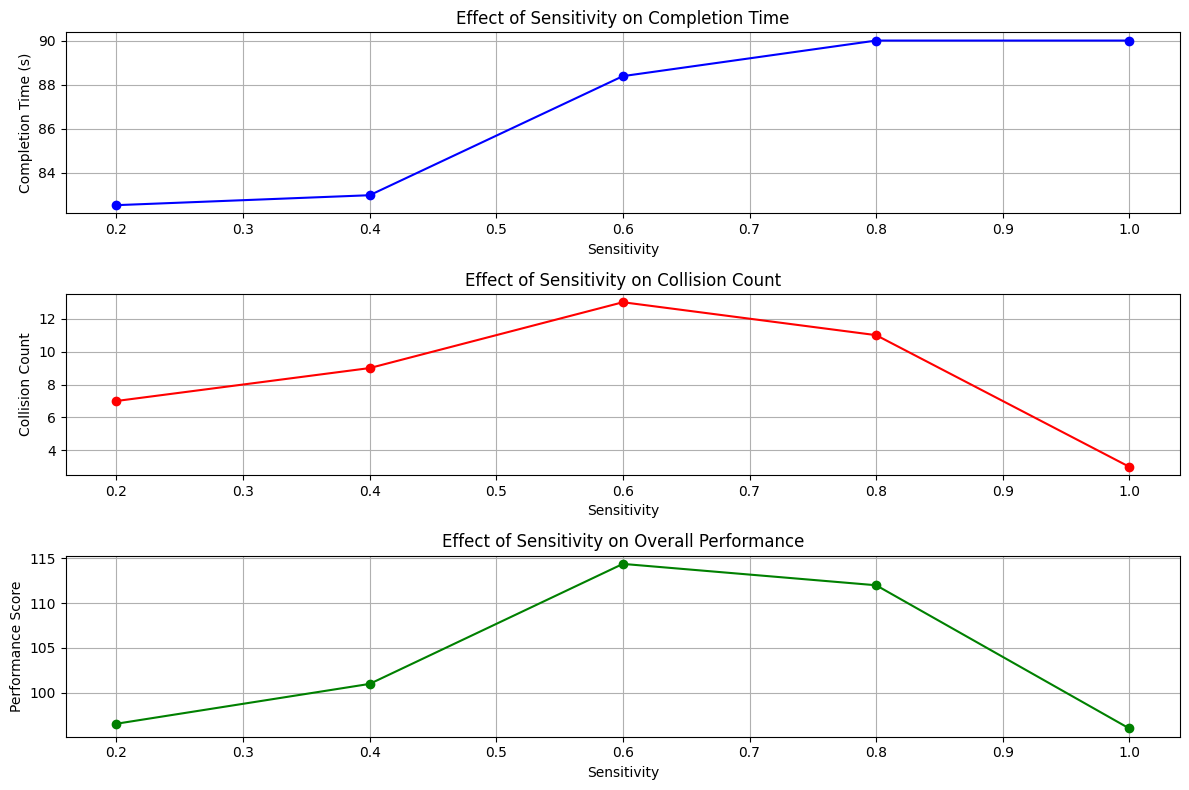

In [ ]:
import pygame
import math
import random
import matplotlib.pyplot as plt
import numpy as np

# Initialize Pygame
pygame.init()

# Window setup
WIDTH, HEIGHT = 1000, 1000
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Braitenberg Vehicle Maze Navigation")

# Font setup for display text
font = pygame.font.Font(None, 36)

# Define colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
TRACE_COLOR = (0, 255, 0)  # Green trace

# User Inputs
try:
    max_speed = float(input("Enter Robot Max Speed (default 5): ") or 5)
    turn_rate = float(input("Enter Turning Rate in degrees/unit time (default 2): ") or 2)
    sensor_range = float(input("Enter Sensor Range (default 150): ") or 150)
    sensitivity = float(input("Enter Sensitivity Factor (0.2-1.0, default 0.6): ") or 0.6)
except ValueError:
    print("Invalid input! Using default values.")
    max_speed = 5
    turn_rate = 2
    sensor_range = 150
    sensitivity = 0.6

# Robot setup
robot_x, robot_y = 100, 100  # Start position
robot_size = 40
heading_angle = 270  # Facing upwards
speed = 0  # Initial speed
acceleration = 0.2  # Acceleration rate
deceleration = 0.1  # Deceleration rate

# Sensor setup
left_sensor_angle = 45  # Degrees offset from heading
right_sensor_angle = -45  # Degrees offset from heading
left_sensor_reading = 0
right_sensor_reading = 0

# Maze walls - defined as line segments (x1, y1, x2, y2)
walls = []

# Function to add a wall segment
def add_wall(x1, y1, x2, y2):
    walls.append((x1, y1, x2, y2))

# Create outer boundary
add_wall(50, 50, 950, 50)    # Top wall
add_wall(50, 50, 50, 950)    # Left wall
add_wall(50, 950, 950, 950)  # Bottom wall
add_wall(950, 50, 950, 950)  # Right wall

# Add internal walls to create a maze
# Horizontal walls
add_wall(400, 200, 800, 200)
add_wall(200, 800, 600, 800)
add_wall(200, 400, 600, 400)
add_wall(400, 600, 800, 600)
# add_wall(350, 800, 950, 800)

# Vertical walls
add_wall(200, 50, 200, 800)
add_wall(800, 200, 800, 950)
# add_wall(500, 350, 500, 800)
# add_wall(650, 50, 650, 650)
# add_wall(800, 200, 800, 800)

# Start and finish positions
start_x, start_y = 100, 100
finish_x, finish_y = 900, 900

# Store trace positions
trace_points = []

# Performance metrics
collision_count = 0
start_time = pygame.time.get_ticks()
elapsed_time = 0
completed = False

# Helper functions for collision detection and sensor readings
def point_to_line_distance(x, y, x1, y1, x2, y2):
    # Calculate distance from point (x,y) to line segment (x1,y1)-(x2,y2)
    A = x - x1
    B = y - y1
    C = x2 - x1
    D = y2 - y1

    dot = A * C + B * D
    len_sq = C * C + D * D
    
    if len_sq == 0:  # Line segment is just a point
        return math.sqrt(A * A + B * B)
    
    # Calculate projection parameter
    param = dot / len_sq
    
    if param < 0:
        xx = x1
        yy = y1
    elif param > 1:
        xx = x2
        yy = y2
    else:
        xx = x1 + param * C
        yy = y1 + param * D
    
    return math.sqrt((x - xx) ** 2 + (y - yy) ** 2)

def line_intersection(x1, y1, x2, y2, x3, y3, x4, y4):
    # Calculate intersection of two line segments
    den = (y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1)
    
    if den == 0:
        return None  # Lines are parallel
    
    ua = ((x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)) / den
    ub = ((x2 - x1) * (y1 - y3) - (y2 - y1) * (x1 - x3)) / den
    
    if 0 <= ua <= 1 and 0 <= ub <= 1:
        x = x1 + ua * (x2 - x1)
        y = y1 + ua * (y2 - y1)
        return (x, y)
    
    return None

def check_collision():
    # Check collision with any wall
    robot_radius = robot_size / 2
    for x1, y1, x2, y2 in walls:
        distance = point_to_line_distance(robot_x, robot_y, x1, y1, x2, y2)
        if distance < robot_radius:
            return True
    return False

def get_sensor_readings():
    global left_sensor_reading, right_sensor_reading
    
    # Calculate sensor positions and directions
    left_sensor_angle_rad = math.radians(heading_angle + left_sensor_angle)
    right_sensor_angle_rad = math.radians(heading_angle + right_sensor_angle)
    
    left_sensor_x = robot_x + math.cos(left_sensor_angle_rad) * (robot_size/2)
    left_sensor_y = robot_y - math.sin(left_sensor_angle_rad) * (robot_size/2)
    
    right_sensor_x = robot_x + math.cos(right_sensor_angle_rad) * (robot_size/2)
    right_sensor_y = robot_y - math.sin(right_sensor_angle_rad) * (robot_size/2)
    
    # Reset readings
    left_sensor_reading = 0
    right_sensor_reading = 0
    
    # Calculate sensor ray endpoints
    left_ray_end_x = left_sensor_x + math.cos(left_sensor_angle_rad) * sensor_range
    left_ray_end_y = left_sensor_y - math.sin(left_sensor_angle_rad) * sensor_range
    
    right_ray_end_x = right_sensor_x + math.cos(right_sensor_angle_rad) * sensor_range
    right_ray_end_y = right_sensor_y - math.sin(right_sensor_angle_rad) * sensor_range
    
    # Check for ray intersection with walls
    left_min_distance = sensor_range
    right_min_distance = sensor_range
    
    for wall_x1, wall_y1, wall_x2, wall_y2 in walls:
        # Check left sensor
        left_intersection = line_intersection(
            left_sensor_x, left_sensor_y, left_ray_end_x, left_ray_end_y,
            wall_x1, wall_y1, wall_x2, wall_y2
        )
        
        if left_intersection:
            ix, iy = left_intersection
            distance = math.sqrt((left_sensor_x - ix)**2 + (left_sensor_y - iy)**2)
            if distance < left_min_distance:
                left_min_distance = distance
        
        # Check right sensor
        right_intersection = line_intersection(
            right_sensor_x, right_sensor_y, right_ray_end_x, right_ray_end_y,
            wall_x1, wall_y1, wall_x2, wall_y2
        )
        
        if right_intersection:
            ix, iy = right_intersection
            distance = math.sqrt((right_sensor_x - ix)**2 + (right_sensor_y - iy)**2)
            if distance < right_min_distance:
                right_min_distance = distance
    
    # Convert distances to readings (closer = higher reading)
    if left_min_distance < sensor_range:
        left_sensor_reading = max(0, 1 - (left_min_distance / sensor_range))
    
    if right_min_distance < sensor_range:
        right_sensor_reading = max(0, 1 - (right_min_distance / sensor_range))
    
    # Apply sensitivity factor
    left_sensor_reading *= sensitivity
    right_sensor_reading *= sensitivity
    
    return left_sensor_reading, right_sensor_reading

def check_finish():
    # Check if robot has reached the finish
    distance_to_finish = math.sqrt((robot_x - finish_x)**2 + (robot_y - finish_y)**2)
    if distance_to_finish < 30:  # Finish radius
        return True
    return False

# Main loop
running = True
auto_mode = True
mode_text = "Mode: Manual"

# For sensitivity analysis
sensitivity_values = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []
current_sensitivity_index = 0
current_trial = 0
max_trials = len(sensitivity_values)
timeout = 90000  # 90 seconds timeout per trial

def run_sensitivity_analysis():
    global robot_x, robot_y, heading_angle, speed, trace_points, collision_count, start_time, elapsed_time, completed, sensitivity
    
    sensitivity_values = [0.2, 0.4, 0.6, 0.8, 1.0]
    results = []
    
    for sens in sensitivity_values:
        print(f"\nRunning trial with sensitivity = {sens}")
        sensitivity = sens
        
        # Reset robot
        robot_x, robot_y = start_x, start_y
        heading_angle = 90
        speed = 0
        trace_points = []
        collision_count = 0
        start_time = pygame.time.get_ticks()
        elapsed_time = 0
        completed = False
        
        # Run simulation in auto mode
        auto_mode = True
        trial_running = True
        timeout = 90000  # 90 seconds timeout
        
        while trial_running and pygame.time.get_ticks() - start_time < timeout:
            # Process events to keep window responsive
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    return
            
            # Get sensor readings
            left_reading, right_reading = get_sensor_readings()
            
            # Braitenberg vehicle behavior
            turn_amount = (right_reading - left_reading) * turn_rate
            heading_angle += turn_amount
            
            obstacle_factor = max(left_reading, right_reading)
            target_speed = max_speed * (1 - obstacle_factor * 0.8)
            
            if speed < target_speed:
                speed = min(target_speed, speed + acceleration)
            elif speed > target_speed:
                speed = max(target_speed, speed - deceleration)
            
            # Move robot
            old_x, old_y = robot_x, robot_y
            robot_x += speed * math.cos(math.radians(heading_angle))
            robot_y -= speed * math.sin(math.radians(heading_angle))
            
            # Check for collision
            if check_collision():
                robot_x, robot_y = old_x, old_y
                heading_angle += random.uniform(-45, 45)
                speed = -speed * 0.5
                collision_count += 1
            
            # Check if finished
            if check_finish():
                elapsed_time = (pygame.time.get_ticks() - start_time) / 1000
                trial_running = False
                completed = True
                print(f"Completed with sensitivity {sens}: Time = {elapsed_time:.2f}s, Collisions = {collision_count}")
            
            # Update display for visualization
            screen.fill(WHITE)
            
            # Draw trace
            for point in trace_points:
                pygame.draw.circle(screen, TRACE_COLOR, point, 2)
            
            # Draw maze walls
            for x1, y1, x2, y2 in walls:
                pygame.draw.line(screen, BLACK, (x1, y1), (x2, y2), 3)
            
            # Draw start and finish
            pygame.draw.circle(screen, GREEN, (start_x, start_y), 20, 2)
            pygame.draw.circle(screen, RED, (finish_x, finish_y), 20, 2)
            
            # Draw robot
            robot = pygame.Surface((robot_size, robot_size), pygame.SRCALPHA)
            pygame.draw.polygon(robot, RED, [(robot_size // 2, 0), (0, robot_size), (robot_size, robot_size)])
            rotated_robot = pygame.transform.rotate(robot, heading_angle - 90)
            rect = rotated_robot.get_rect(center=(robot_x, robot_y))
            screen.blit(rotated_robot, rect.topleft)
            
            # Draw sensor rays
            left_sensor_angle_rad = math.radians(heading_angle + left_sensor_angle)
            right_sensor_angle_rad = math.radians(heading_angle + right_sensor_angle)
            
            left_sensor_x = robot_x + math.cos(left_sensor_angle_rad) * (robot_size/2)
            left_sensor_y = robot_y - math.sin(left_sensor_angle_rad) * (robot_size/2)
            
            right_sensor_x = robot_x + math.cos(right_sensor_angle_rad) * (robot_size/2)
            right_sensor_y = robot_y - math.sin(right_sensor_angle_rad) * (robot_size/2)
            
            left_ray_end_x = left_sensor_x + math.cos(left_sensor_angle_rad) * sensor_range
            left_ray_end_y = left_sensor_y - math.sin(left_sensor_angle_rad) * sensor_range
            
            right_ray_end_x = right_sensor_x + math.cos(right_sensor_angle_rad) * sensor_range
            right_ray_end_y = right_sensor_y - math.sin(right_sensor_angle_rad) * sensor_range
            
            left_color = (int(255 * left_reading), 0, 0)
            right_color = (int(255 * right_reading), 0, 0)
            
            pygame.draw.line(screen, left_color, (left_sensor_x, left_sensor_y), (left_ray_end_x, left_ray_end_y), 2)
            pygame.draw.line(screen, right_color, (right_sensor_x, right_sensor_y), (right_ray_end_x, right_ray_end_y), 2)
            
            # Display information
            current_time = (pygame.time.get_ticks() - start_time) / 1000
            info_text = [
                f"Mode: Auto (Analysis)",
                f"Sensitivity: {sensitivity:.2f}",
                f"Speed: {speed:.2f}",
                f"Time: {current_time:.2f}s",
                f"Collisions: {collision_count}"
            ]
            
            for i, text in enumerate(info_text):
                text_surface = font.render(text, True, BLACK)
                screen.blit(text_surface, (10, 10 + i * 30))
            
            pygame.display.update()
            
            # Store trace
            trace_points.append((int(robot_x), int(robot_y)))
            
            # Check for timeout
            if pygame.time.get_ticks() - start_time > timeout:
                elapsed_time = timeout / 1000
                trial_running = False
                print(f"Trial timed out with sensitivity {sens}")
        
        # Record results
        performance_score = elapsed_time + collision_count * 2  # Penalize collisions more
        results.append((sens, elapsed_time, collision_count, performance_score))
    
    # Find best sensitivity
    best_sensitivity = min(results, key=lambda x: x[3])
    print("\nSensitivity Analysis Results:")
    print("Sensitivity | Time (s) | Collisions | Performance Score")
    print("-" * 50)
    for sens, time, collisions, score in results:
        print(f"{sens:.1f}        | {time:.2f}    | {collisions}         | {score:.2f}")
    print(f"\nBest sensitivity: {best_sensitivity[0]} (Score: {best_sensitivity[3]:.2f})")
    
    # Plot results
    try:
        import matplotlib.pyplot as plt
        import numpy as np
        
        sens_values = [r[0] for r in results]
        times = [r[1] for r in results]
        collisions = [r[2] for r in results]
        scores = [r[3] for r in results]
        
        plt.figure(figsize=(12, 8))
        
        # Plot completion time
        plt.subplot(3, 1, 1)
        plt.plot(sens_values, times, 'bo-')
        plt.xlabel('Sensitivity')
        plt.ylabel('Completion Time (s)')
        plt.title('Effect of Sensitivity on Completion Time')
        plt.grid(True)
        
        # Plot collision count
        plt.subplot(3, 1, 2)
        plt.plot(sens_values, collisions, 'ro-')
        plt.xlabel('Sensitivity')
        plt.ylabel('Collision Count')
        plt.title('Effect of Sensitivity on Collision Count')
        plt.grid(True)
        
        # Plot performance score
        plt.subplot(3, 1, 3)
        plt.plot(sens_values, scores, 'go-')
        plt.xlabel('Sensitivity')
        plt.ylabel('Performance Score')
        plt.title('Effect of Sensitivity on Overall Performance')
        plt.grid(True)
        
        plt.tight_layout()
        plt.savefig('sensitivity_analysis.png')
        print("Analysis graphs saved to 'sensitivity_analysis.png'")
        
    except ImportError:
        print("Matplotlib not available. Skipping graph generation.")


while running:
    screen.fill(WHITE)  # Clear screen
    
    # Draw trace
    for point in trace_points:
        pygame.draw.circle(screen, TRACE_COLOR, point, 2)
    
    # Draw maze walls
    for x1, y1, x2, y2 in walls:
        pygame.draw.line(screen, BLACK, (x1, y1), (x2, y2), 3)
    
    # Draw start and finish
    pygame.draw.circle(screen, GREEN, (start_x, start_y), 20, 2)
    pygame.draw.circle(screen, RED, (finish_x, finish_y), 20, 2)
    
    # Event handling
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_a:
                print("Starting sensitivity analysis...")
                run_sensitivity_analysis()
                print("Analysis complete!")

        # elif event.type == pygame.KEYDOWN:
            # if event.key == pygame.K_SPACE:
            #     auto_mode = not auto_mode
            #     mode_text = "Mode: Auto" if auto_mode else "Mode: Manual"
            #     print(f"Switched to {mode_text}")
    
    # Get sensor readings
    left_reading, right_reading = get_sensor_readings()
    
    if auto_mode:
        # Braitenberg vehicle behavior (cross-wired)
        # Right sensor controls left wheel, left sensor controls right wheel
        # This creates obstacle avoidance behavior
        
        # Calculate turn based on sensor difference
        turn_amount = (right_reading - left_reading) * turn_rate
        heading_angle += turn_amount
        
        # Adjust speed based on sensor readings
        # Slow down when obstacles are detected
        obstacle_factor = max(left_reading, right_reading)
        target_speed = max_speed * (1 - obstacle_factor * 0.8)
        
        if speed < target_speed:
            speed = min(target_speed, speed + acceleration)
        elif speed > target_speed:
            speed = max(target_speed, speed - deceleration)
    # else:
    #     # Manual control
    #     keys = pygame.key.get_pressed()
        
    #     # Rotation
    #     if keys[pygame.K_LEFT]:
    #         heading_angle += turn_rate
    #     if keys[pygame.K_RIGHT]:
    #         heading_angle -= turn_rate
            
    #     # Acceleration & Deceleration
    #     if keys[pygame.K_UP]:
    #         speed = min(max_speed, speed + acceleration)
    #     elif keys[pygame.K_DOWN]:
    #         speed = max(-max_speed, speed - acceleration)
    #     else:
    #         if speed > 0:
    #             speed = max(0, speed - deceleration)
    #         elif speed < 0:
    #             speed = min(0, speed + deceleration)
    
    # Convert angle to movement
    old_x, old_y = robot_x, robot_y
    robot_x += speed * math.cos(math.radians(heading_angle))
    robot_y -= speed * math.sin(math.radians(heading_angle))
    
    # Check for collision
    if check_collision():
        # Collision response - back up and turn randomly
        robot_x, robot_y = old_x, old_y
        heading_angle += random.uniform(-45, 45)
        speed = -speed * 0.5  # Reverse at half speed
        collision_count += 1
        print(f"Collision! Count: {collision_count}")
    
    # Check if finished
    if check_finish() and not completed:
        completed = True
        elapsed_time = (pygame.time.get_ticks() - start_time) / 1000  # Convert to seconds
        print(f"Maze completed! Time: {elapsed_time:.2f} seconds, Collisions: {collision_count}")
        running = False
    
    # Store trace
    trace_points.append((int(robot_x), int(robot_y)))
    
    # Draw the robot (rotating triangle)
    robot = pygame.Surface((robot_size, robot_size), pygame.SRCALPHA)
    pygame.draw.polygon(robot, RED, [(robot_size // 2, 0), (0, robot_size), (robot_size, robot_size)])
    rotated_robot = pygame.transform.rotate(robot, heading_angle - 90)
    rect = rotated_robot.get_rect(center=(robot_x, robot_y))
    screen.blit(rotated_robot, rect.topleft)
    
    # Draw sensor rays
    left_sensor_angle_rad = math.radians(heading_angle + left_sensor_angle)
    right_sensor_angle_rad = math.radians(heading_angle + right_sensor_angle)
    
    left_sensor_x = robot_x + math.cos(left_sensor_angle_rad) * (robot_size/2)
    left_sensor_y = robot_y - math.sin(left_sensor_angle_rad) * (robot_size/2)
    
    right_sensor_x = robot_x + math.cos(right_sensor_angle_rad) * (robot_size/2)
    right_sensor_y = robot_y - math.sin(right_sensor_angle_rad) * (robot_size/2)
    
    left_ray_end_x = left_sensor_x + math.cos(left_sensor_angle_rad) * sensor_range
    left_ray_end_y = left_sensor_y - math.sin(left_sensor_angle_rad) * sensor_range
    
    right_ray_end_x = right_sensor_x + math.cos(right_sensor_angle_rad) * sensor_range
    right_ray_end_y = right_sensor_y - math.sin(right_sensor_angle_rad) * sensor_range
    
    # Draw sensor rays with color based on reading intensity
    left_color = (int(255 * left_reading), 0, 0)
    right_color = (int(255 * right_reading), 0, 0)
    
    pygame.draw.line(screen, left_color, (left_sensor_x, left_sensor_y), (left_ray_end_x, left_ray_end_y), 2)
    pygame.draw.line(screen, right_color, (right_sensor_x, right_sensor_y), (right_ray_end_x, right_ray_end_y), 2)
    
    # Display information
    if not completed:
        elapsed_time = (pygame.time.get_ticks() - start_time) / 1000
    
    # info_text = [
    #     f"{mode_text}",
    #     f"Speed: {speed:.2f}",
    #     f"Sensitivity: {sensitivity:.2f}",
    #     f"Time: {elapsed_time:.2f}s",
    #     f"Collisions: {collision_count}"
    # ]
    # Add to your info_text list:
    info_text = [
        f"{mode_text}",
        f"Speed: {speed:.2f}",
        f"Sensitivity: {sensitivity:.2f}",
        f"Time: {elapsed_time:.2f}s",
        f"Collisions: {collision_count}",
        "Press SPACE to toggle auto/manual",
        "Press A to run sensitivity analysis"
    ]

    
    for i, text in enumerate(info_text):
        text_surface = font.render(text, True, BLACK)
        screen.blit(text_surface, (10, 10 + i * 30))
    
    pygame.display.update()
    
    # Check for timeout
    if auto_mode and elapsed_time > timeout and not completed:
        print(f"Trial timed out after {timeout/1000} seconds")
        completed = True

pygame.quit()


In [2]:
def run_sensitivity_analysis():
    global robot_x, robot_y, heading_angle, speed, trace_points, collision_count, start_time, elapsed_time, completed, sensitivity
    
    sensitivity_values = [0.2, 0.4, 0.6, 0.8, 1.0]
    results = []
    
    for sens in sensitivity_values:
        print(f"\nRunning trial with sensitivity = {sens}")
        sensitivity = sens
        
        # Reset robot
        robot_x, robot_y = start_x, start_y
        heading_angle = 90
        speed = 0
        trace_points = []
        collision_count = 0
        start_time = pygame.time.get_ticks()
        elapsed_time = 0
        completed = False
        
        # Run simulation in auto mode
        auto_mode = True
        trial_running = True
        timeout = 90000  # 90 seconds timeout
        
        while trial_running and pygame.time.get_ticks() - start_time < timeout:
            # Process events to keep window responsive
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    return
            
            # Get sensor readings
            left_reading, right_reading = get_sensor_readings()
            
            # Braitenberg vehicle behavior
            turn_amount = (right_reading - left_reading) * turn_rate
            heading_angle += turn_amount
            
            obstacle_factor = max(left_reading, right_reading)
            target_speed = max_speed * (1 - obstacle_factor * 0.8)
            
            if speed < target_speed:
                speed = min(target_speed, speed + acceleration)
            elif speed > target_speed:
                speed = max(target_speed, speed - deceleration)
            
            # Move robot
            old_x, old_y = robot_x, robot_y
            robot_x += speed * math.cos(math.radians(heading_angle))
            robot_y -= speed * math.


SyntaxError: invalid syntax (2143644488.py, line 51)